In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = 'https://github.com/Rodrigojaure92/30daychartchallenge/raw/refs/heads/main/Day28-trend/dataset.csv'
datos = pd.read_csv(url, delimiter=",")

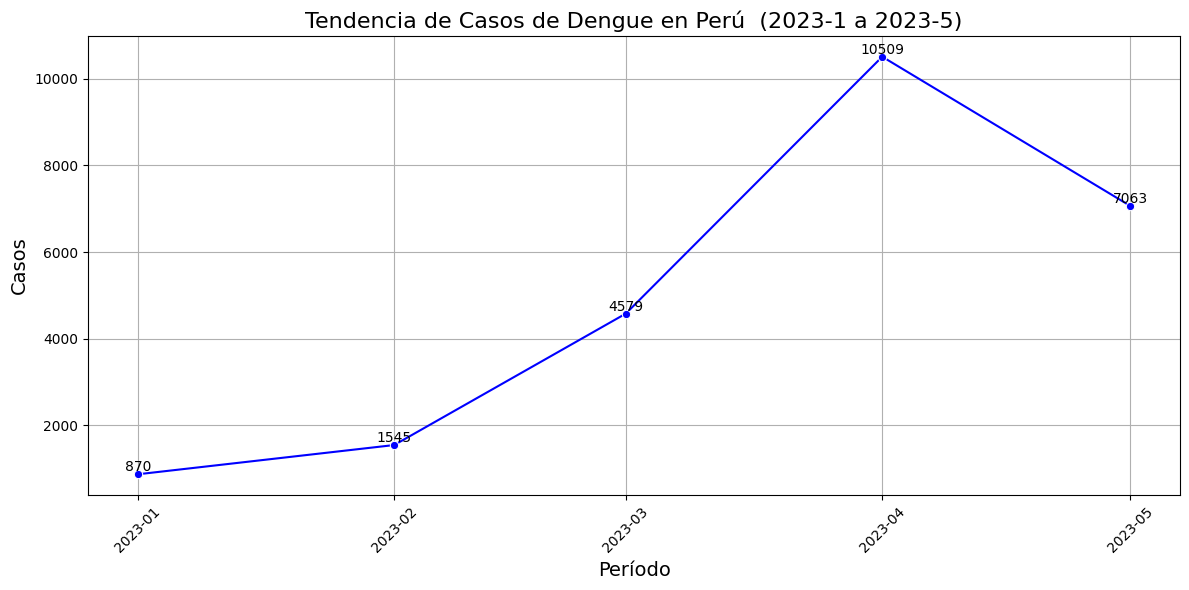

In [7]:
datos['FECHA_INGRESO'] = pd.to_datetime(datos['FECHA_INGRESO'].astype(str), format='%Y%m%d', errors='coerce')
datos = datos[datos['FECHA_INGRESO'].notnull()]
tendencia = datos.groupby(datos['FECHA_INGRESO'].dt.to_period('M')).size().reset_index(name='Conteo')
tendencia['FECHA_INGRESO'] = tendencia['FECHA_INGRESO'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(data=tendencia, x='FECHA_INGRESO', y='Conteo', marker='o', color='blue')
plt.title('Tendencia de Casos de Dengue en Perú  (2023-1 a 2023-5)', fontsize=16)
plt.xlabel('Período', fontsize=14)
plt.ylabel('Casos', fontsize=14)
plt.xticks(ticks=tendencia['FECHA_INGRESO'], labels=tendencia['FECHA_INGRESO'].dt.strftime('%Y-%m'), rotation=45)
for i in range(len(tendencia)):
    plt.text(tendencia['FECHA_INGRESO'].iloc[i], tendencia['Conteo'].iloc[i] + 1,
             str(tendencia['Conteo'].iloc[i]),
             ha='center', va='bottom', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()